## EXPLORATORY DATA ANALYSIS

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the data
data = pd.read_csv('../Notebooks/clean_data.csv')

In [3]:
# preview data
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,not current,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,not current,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [4]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
96082,Female,36,0,0,No Info,24.60,4.8,145,0
96083,Female,2,0,0,No Info,17.37,6.5,100,0
96084,Male,66,0,0,not current,27.83,5.7,155,0
96085,Female,24,0,0,not current,35.42,4.0,100,0
96086,Female,57,0,0,current,22.43,6.6,90,0


In [5]:
# split to numerical and categorical data

numerical_df = data.select_dtypes(exclude = "object")
catgorical_df = data.select_dtypes(include = "object")

In [6]:
# check the numerical data
numerical_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,54,0,0,27.32,6.6,80,0
2,28,0,0,27.32,5.7,158,0
3,36,0,0,23.45,5.0,155,0
4,76,1,1,20.14,4.8,155,0


In [7]:
# check the categorical data
catgorical_df.head()

,gender,smoking_history
0,Female,not current
1,Female,No Info
2,Male,not current
3,Female,current
4,Male,current


In [8]:
# create function for histogram and box plots

def create_box_histplot(data_frame,columns= [] ,hist = False, box = False):
    # make a copy of dataframe
    df = data_frame.copy()

    # number of columns for subplot is same as number of features
    ncolumns = len(columns)
    # Set number of columns and dynamic figure size
    subplot_width = 5  # Set desired width per subplot
    subplot_height = 4  # Set desired height per subplot
    figsize = (ncolumns * subplot_width, subplot_height)     
    fig, axes = plt.subplots(nrows=1, ncols=ncolumns,figsize = figsize)
    
    for index, feature in enumerate(columns):
        if hist == True:
            sns.histplot(data = df[feature], ax = axes[index])
        if box == True:
            sns.boxplot(data = df[feature], ax=axes[index])
    plt.tight_layout()
    plt.show();

### Univariate Analysis for Numerical features

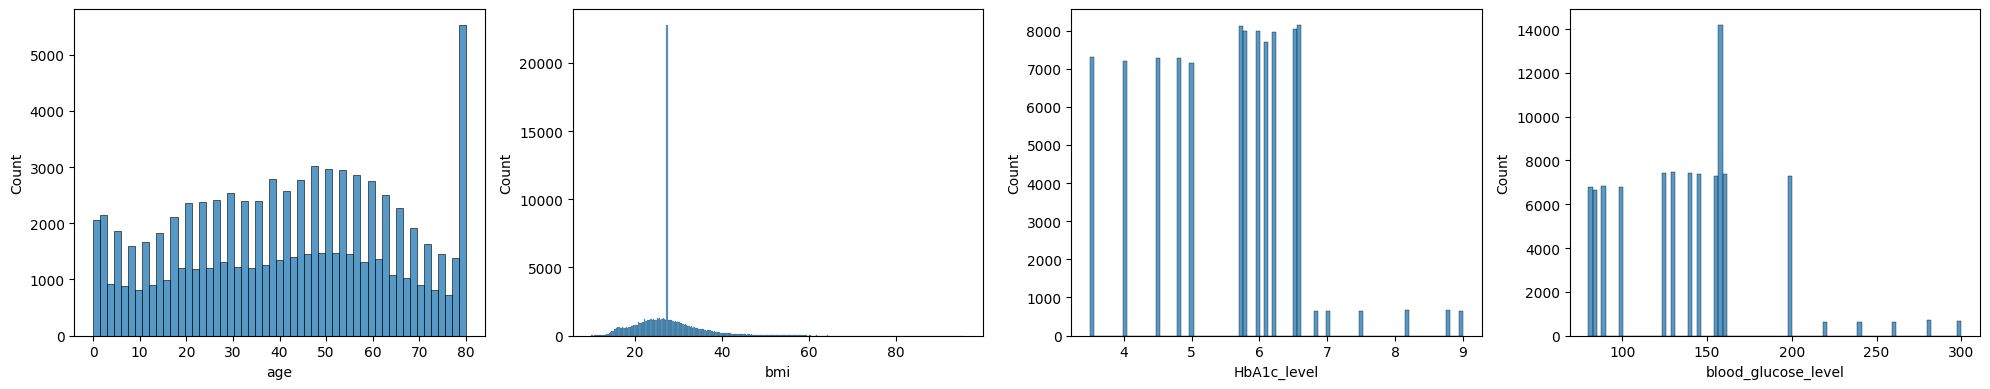

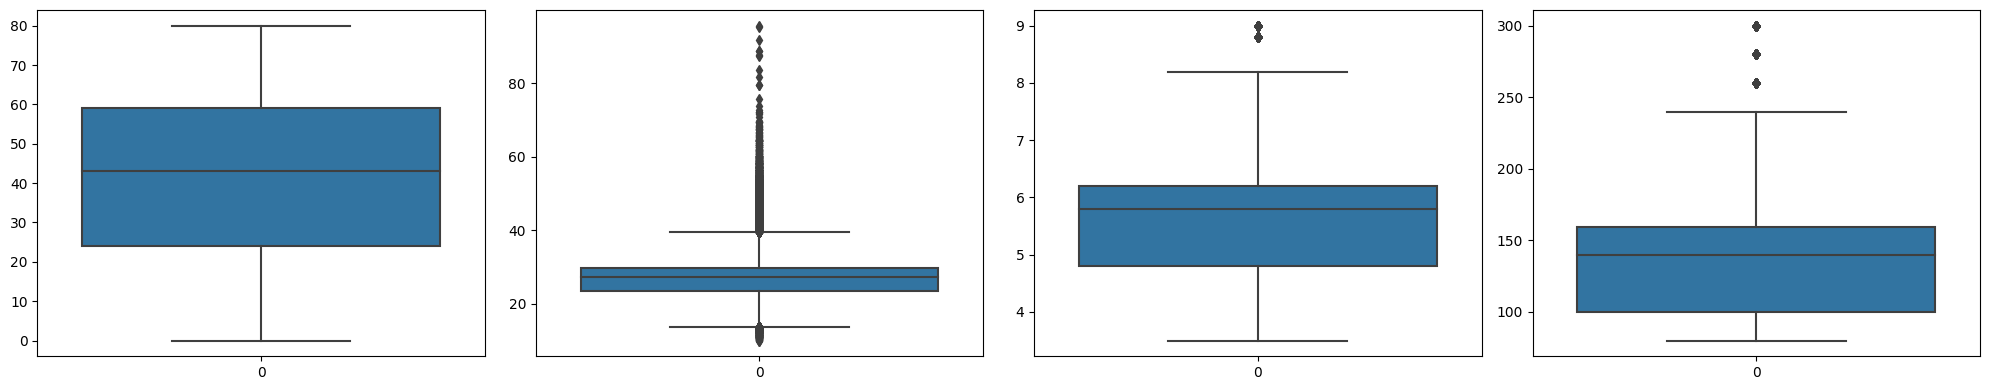

In [9]:
# box plot and histogram of numerical data
create_box_histplot(data_frame=numerical_df, columns=["age", "bmi", "HbA1c_level", "blood_glucose_level"], hist = True)
create_box_histplot(data_frame=numerical_df,columns=["age", "bmi", "HbA1c_level", "blood_glucose_level"], box = True)

In [10]:
# plot function for binary numerical features
# pie chart for heart disease, diabetes and hypertension

def plot_pie(data, columns = []):
    df = data.copy()
    
    ncolumns = len(columns)
    
    # Set number of columns and dynamic figure size
    subplot_width = 5 
    subplot_height = 4 
    
    # calculate appropriate size for subplot
    figsize = (ncolumns * subplot_width, subplot_height)     
    fig, axes = plt.subplots(nrows=1, ncols=ncolumns,figsize = figsize)
    
    # flatten axes for iteration
    axes = axes.flatten()
    
    # If there's only one feature, 'axes' will not be an array, so handle this case
    if ncolumns == 1:
        axes = [axes]
        
    for index, feature in enumerate(columns):
        if feature in df.columns:
            
            # convert data into string if numerical
            df[feature] = df[feature].astype("object")
            values = df[feature].value_counts()
            axes[index].pie(values, labels=values.index, autopct='%1.1f%%', startangle=140)
            axes[index].set_title(f'Distribution of {feature}')
            
        else:
            print(f"Feature '{feature}' not found in the dataset.")

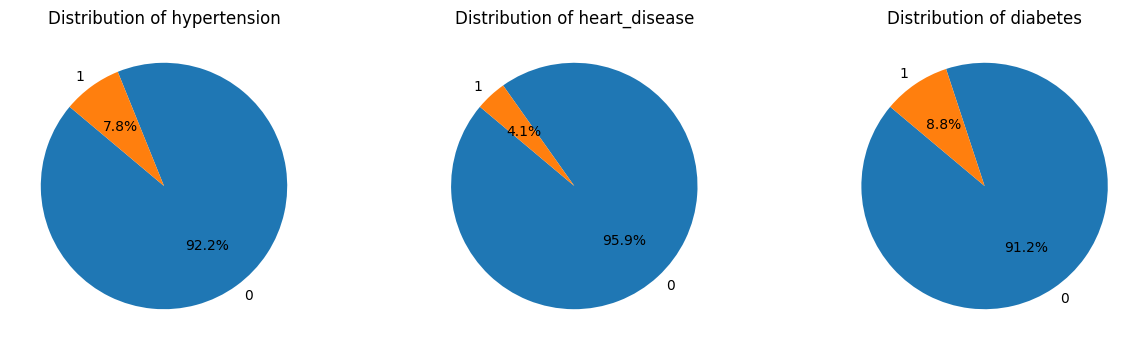

In [11]:
plot_pie(data, ["hypertension", "heart_disease", "diabetes"])

Label "0": non-hypertensive, non-diabetic and no heart disease
Label "1": hypertensive, diabetic and has heart disease

1. Hypertension
    - 92.2% of the population are not hypertensive, while 7.8% are hypertensive. This is indicative of class imbalance.

2. Heart
    - Distribution: 95.9% of the population does not have heart disease, while 4.1% have heart disease. This is indicative of class imbalance.

3. Diabetes
    - 91.2% of the population are non-diabetic, while 8.8% are diabetic. This is indicative of class imbalance.

### Bivariate Analysis for Numerical features

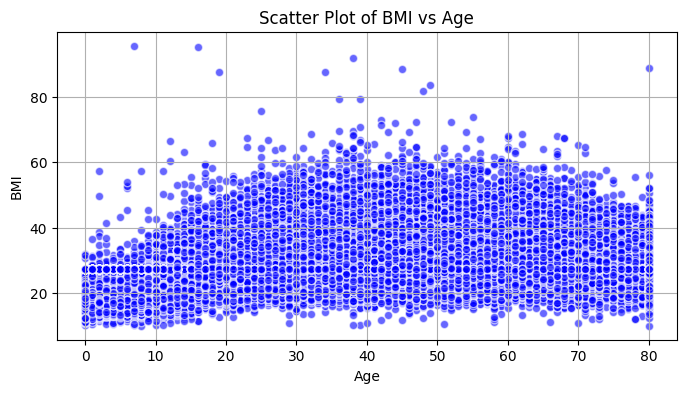

In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'bmi' and 'age'
# Scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(data['age'], data['bmi'], alpha=0.6, c='blue', edgecolors='w')

# Add plot details
plt.title('Scatter Plot of BMI vs Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)

# Show the plot
plt.show()


**Observations**
- BMI values slightly increase with age up to around 45 years, after which they appear to stabilize till around age of 60 years, then slight decrease from 60 to 80 years.
- BMI varies across all ages, showing that individuals of the same age can have different BMI values.

In [13]:
# Investigating the target variables (diabetes column)

unique_target = data['diabetes'].unique().tolist()
unique_target

[0, 1]

In [14]:
# Target - Diabetic or not (0 = no, 1 = yes)
def label(db):
    if db == 1:
        return 'yes'
    else:
        return 'no'

data['diabetes_label'] = data['diabetes'].apply(label)

In [15]:
# Hypertensive or not (0 = no, 1 = yes)
def hypertensive(hyp):
    if hyp == 1:
        return 'yes'
    else:
        return 'no'

data['hypertension_label'] = data['hypertension'].apply(hypertensive)

In [16]:
# Have heart disease or not (0 = no, 1 = yes)
def heart(ds):
    if ds == 1:
        return 'yes'
    else:
        return 'no'

data['heart_disease_label'] = data['heart_disease'].apply(heart)

In [17]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,diabetes_label,hypertension_label,heart_disease_label
0,Female,80,0,1,not current,25.19,6.6,140,0,no,no,yes
1,Female,54,0,0,No Info,27.32,6.6,80,0,no,no,no
2,Male,28,0,0,not current,27.32,5.7,158,0,no,no,no
3,Female,36,0,0,current,23.45,5.0,155,0,no,no,no
4,Male,76,1,1,current,20.14,4.8,155,0,no,yes,yes


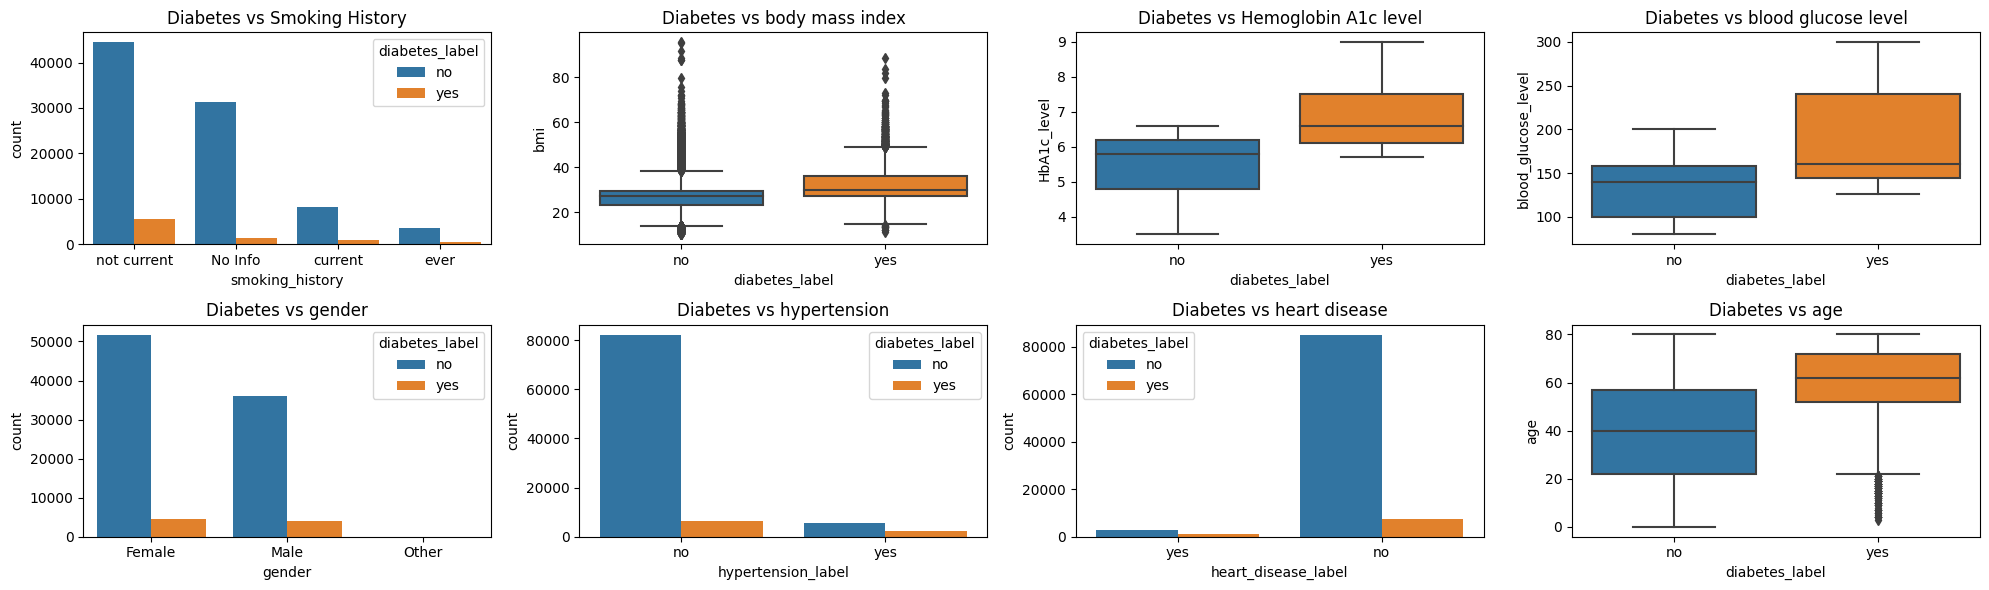

In [18]:
# Investigating the target variable versus other variables

fig, axes = plt.subplots(2, 4, figsize=(20, 6))

sns.countplot(ax=axes[0,0], x='smoking_history', hue='diabetes_label', data=data)
axes[0,0].set_title('Diabetes vs Smoking History')

sns.boxplot(ax=axes[0,1], x='diabetes_label', y='bmi', data=data)
axes[0,1].set_title('Diabetes vs body mass index')

sns.boxplot(ax=axes[0,2], x='diabetes_label', y='HbA1c_level', data=data)
axes[0,2].set_title('Diabetes vs Hemoglobin A1c level')

sns.boxplot(ax=axes[0,3], x='diabetes_label', y='blood_glucose_level', data=data)
axes[0,3].set_title('Diabetes vs blood glucose level')

sns.countplot(ax=axes[1,0], x='gender', hue='diabetes_label', data=data)
axes[1,0].set_title('Diabetes vs gender')

sns.countplot(ax=axes[1,1], x='hypertension_label', hue='diabetes_label', data=data)
axes[1,1].set_title('Diabetes vs hypertension')

sns.countplot(ax=axes[1,2], x='heart_disease_label', hue='diabetes_label', data=data)
axes[1,2].set_title('Diabetes vs heart disease')

sns.boxplot(ax=axes[1,3], x='diabetes_label', y='age', data=data)
axes[1,3].set_title('Diabetes vs age')

#sns.boxplot(ax=axes[0,1], x='diabetes_label', y='bmi', data=data)


# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

`Smoking History:` There is no significant difference in diabetes prevalence among different smoking categories.

`Body Mass Index (BMI):` Those with diabetes tend to have a higher BMI, indicating a correlation between higher BMI and diabetes.

`Hemoglobin A1c Level:` Individuals with diabetes have significantly higher HbA1c levels, as expected since HbA1c is a key marker for diabetes.

`Blood Glucose Level:` People with diabetes have higher blood glucose levels compared to those without. This is also expected since blood glucose level is a significant marker for diabetes.

`Gender:` Diabetes prevalence is relatively similar between genders, though slightly more females are represented overall.

`Hypertension:` There is a higher prevalence of diabetes among those with hypertension.

`Heart Disease:` People with heart disease are more likely to have diabetes compared to those without heart disease.

`Age:` Individuals with diabetes tend to be older, with a higher median age compared to those without diabetes.

`bmi`, `HbA1c levels`, `blood glucose levels`, `hypertension`, `heart disease`, and `age` are closely associated with diabetes.

### Multivariate Analysis

<Figure size 1200x800 with 0 Axes>

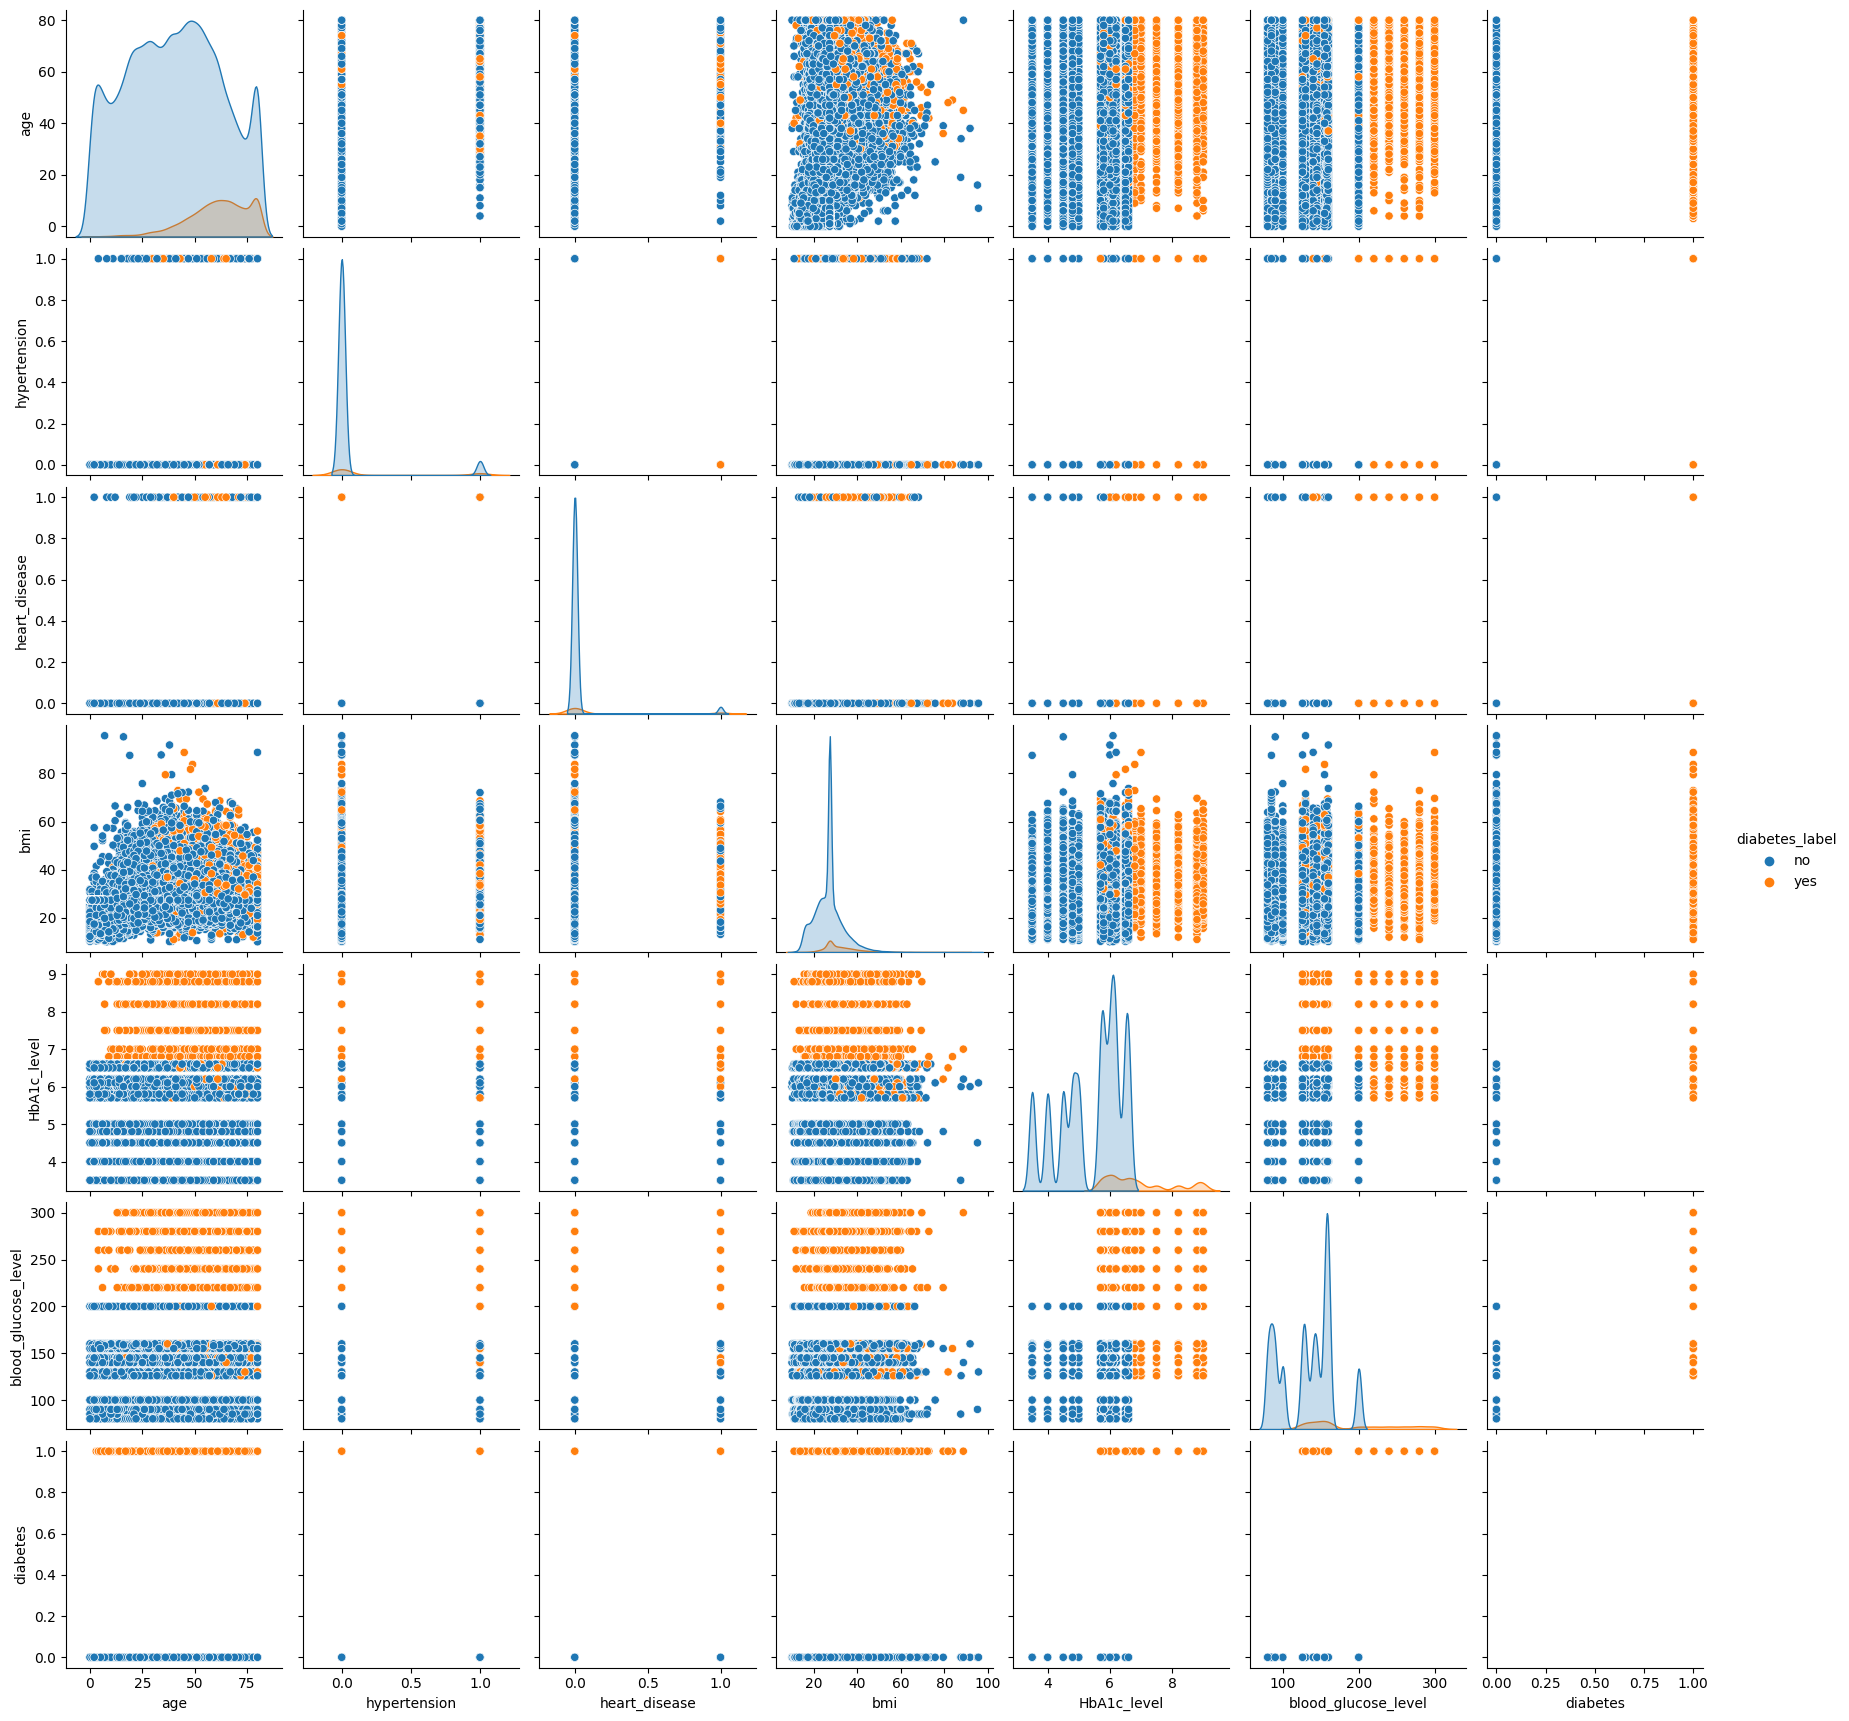

In [19]:
# Comparing all the variables
fig = plt.figure(figsize=(12, 8))

sns.pairplot(data, hue='diabetes_label')
plt.show();

#### Distribution Insights:
`Age:` The distribution of age is fairly normal, with a peak around middle age. There is a slight skew towards older ages. <br>
`BMI:` BMI is concentrated between 20 and 40, showing a spread across these values with few extreme values. <br>
`HbA1c_level and blood_glucose_level:` These are critical markers for diabetes and show a wide range of values, with distinct clusters visible in the plots.

#### Correlations and Relationships:
`Age vs. BMI:` There is no strong correlation visible between age and BMI. <br>
`Blood Glucose and HbA1c Level:` A strong positive correlation exists between these two variables, as expected since both are indicators of blood sugar control.
`Diabetes label or Target label:` The orange points represent individuals with diabetes, and these points are more concentrated at higher HbA1c_level and blood_glucose_level values.

#### Diabetes-Related Observations:
The scatterplots indicate that those with diabetes (orange points) are generally in the higher ranges for both HbA1c_level and blood_glucose_level, reinforcing the connection between these markers and the condition.

#### Class Distributions:
The diabetes_label is balanced across most of the variables, though more individuals without diabetes (blue) are in the lower ranges of HbA1c_level and blood_glucose_level.

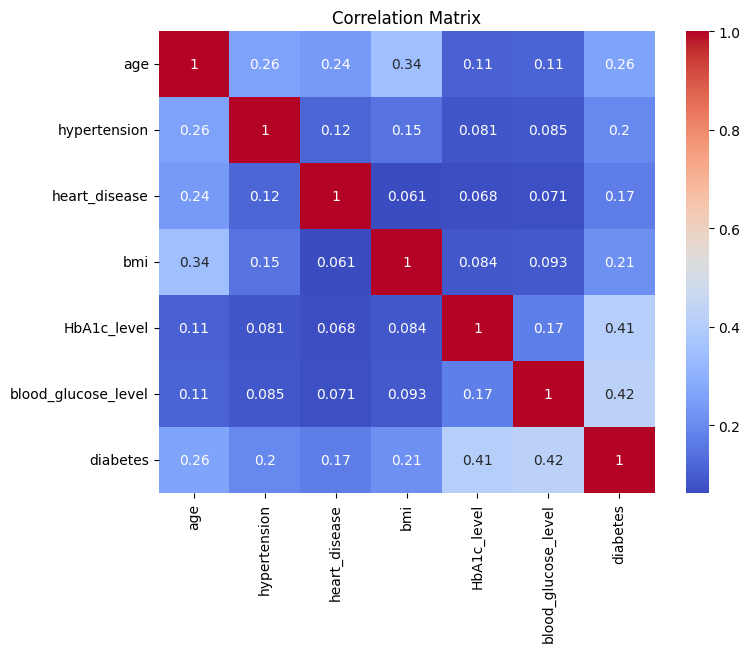

In [20]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), cbar=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Strongest Correlations:

`Diabetes and blood glucose level (0.42):` There is a moderate positive correlation between diabetes and blood glucose levels, which makes sense as high blood glucose is a key indicator of diabetes. <br>
`Diabetes and HbA1c level (0.41):` Similarly, there is a moderate positive correlation between diabetes and HbA1c level, another critical marker for blood sugar control over time. <br>
`BMI and age (0.34):` There is a positive correlation between BMI and age, suggesting that BMI tends to increase with age.

#### Moderate Correlations:
`Age and diabetes (0.26):` There is a moderate correlation between age and diabetes, indicating that the likelihood of diabetes increases with age.
`Hypertension and age (0.26):` There is also a moderate correlation between hypertension and age. <br>
`BMI and diabetes (0.21):` A moderate correlation exists between BMI and diabetes, reflecting that higher BMI might be associated with a greater risk of diabetes.

#### Weaker Correlations:
`Heart disease` shows weak correlations with most other variables but has the highest with `diabetes (0.17)`. <br>
`HbA1c level` has low correlations with most variables except `diabetes and blood glucose level`.

#### Minimal/No Correlation:
`HbA1c level and blood glucose level` have very low correlations with other variables except for their strong associations with `diabetes``.